# Lab 02

### Grad. Communications Lab :: ECEN 4652

##### Maurice Woods

##### 3 February 2017


-------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------


### E01 - "showft"  to  Approximate  FT

#### Part A.)

/home/mowoodsiii/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab01
/home/mowoodsiii/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab02


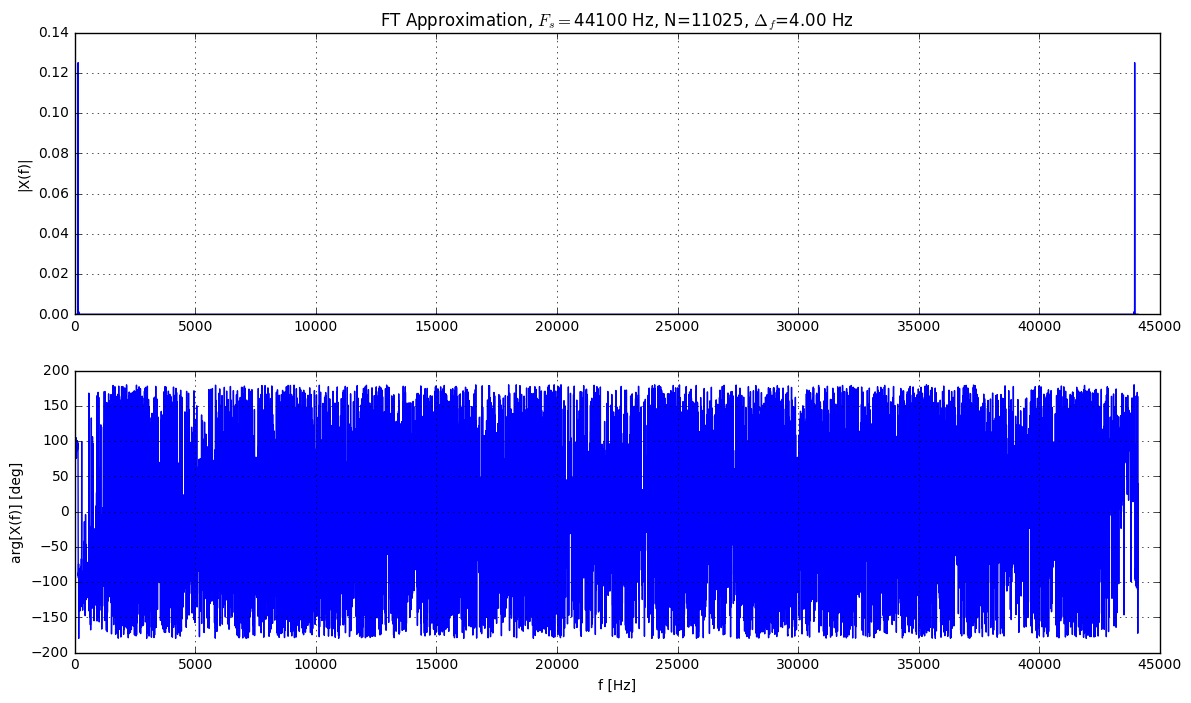

In [1]:
from pylab import *
import ecen4652 as ecen
import showfun                 # Note: May have to change directory to point to showfun.py
% cd ../Lab01
from quickplot import *
% cd -

Fs = 44100                     # Sampling rate
fa, fb = 140, 164              # Frequencies fa, fb
tlen = 0.25                    # Length of t-axis in sec
tt = arange(0,round(Fs*tlen))/float(Fs)  # Time axis
xt = sin(2*pi*fa*tt)-0.01*cos(2*pi*fb*tt)
# Linear combination of two sinusoids
sig_xt = ecen.sigWave(xt, Fs, 0)  # Put this data into a 'Waveform' class sigWave
showfun.showft(sig_xt,[-200, 200, 1e-3])  # Display X(f), using ff_lim

As stated, this is not very useful...it's too condensed. We need to change showft() to accept a window in which to display a certain range of data points.

Changes made to showft():
- The ff_lim = [f1,f2,llim] parameter set now controls the horizontal display of the FT
 - Method: TODO
- The ff_lim = [f1,f2,llim] parameter set now control the vertical display of the FT
 - Method: TODO

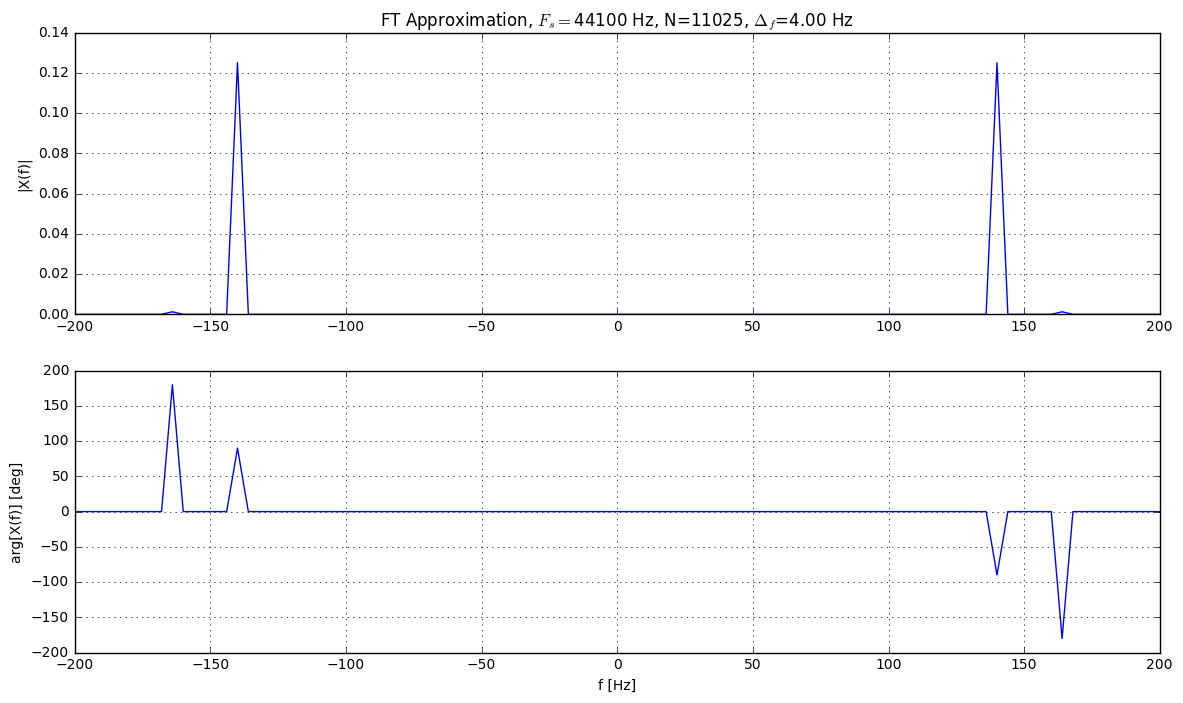

In [2]:
import importlib
showfun.showft_plus(sig_xt,[-200, 200, 1e-3])  # Display X(f), using ff_lim

Question:

> The sine at f_a = 140Hz in x has amplitude 1, but the "spikes" of |X(f)| at f = +/-f_a have only amplitude 0.125. Is that right?

> Hint: For CT impulse functions del(.) the area underneath the impulse determines the size" of the impulse.

Answer:

> TODO

-------------------------------------------------------------------------------------------------------------------------

##### Part B.)

As stated, and confirmed below, sine waves that differ too greatly in amplitude could not be visible on our plots...

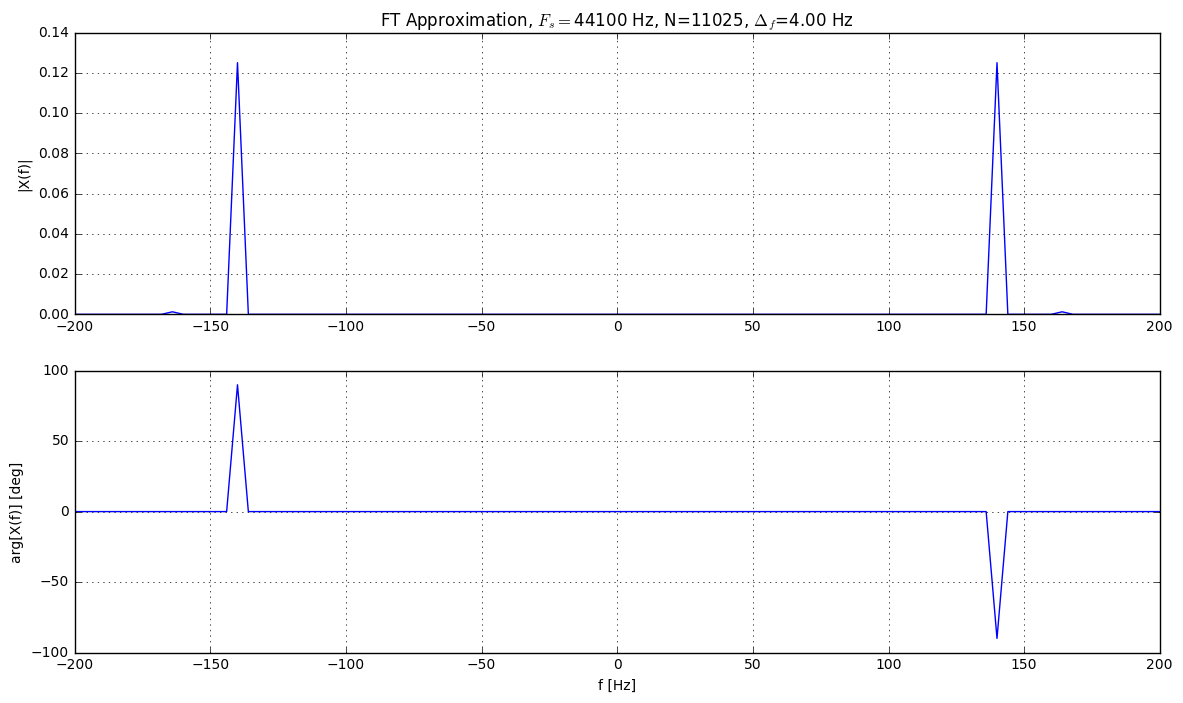

In [3]:
xt2 = sin(2*pi*fa*tt)+0.01*cos(2*pi*fb*tt)
sig_xt2 = ecen.sigWave(xt2, Fs, 0)
showfun.showft_plus(sig_xt2,[-200, 200, 1e-3])

Additional changes made to showft():
- When llim<0 in ff_lim = [f1,f2,llim], the vertical display of the FT is converted to dB
    - Method: TODO

Now, let's check our fix:

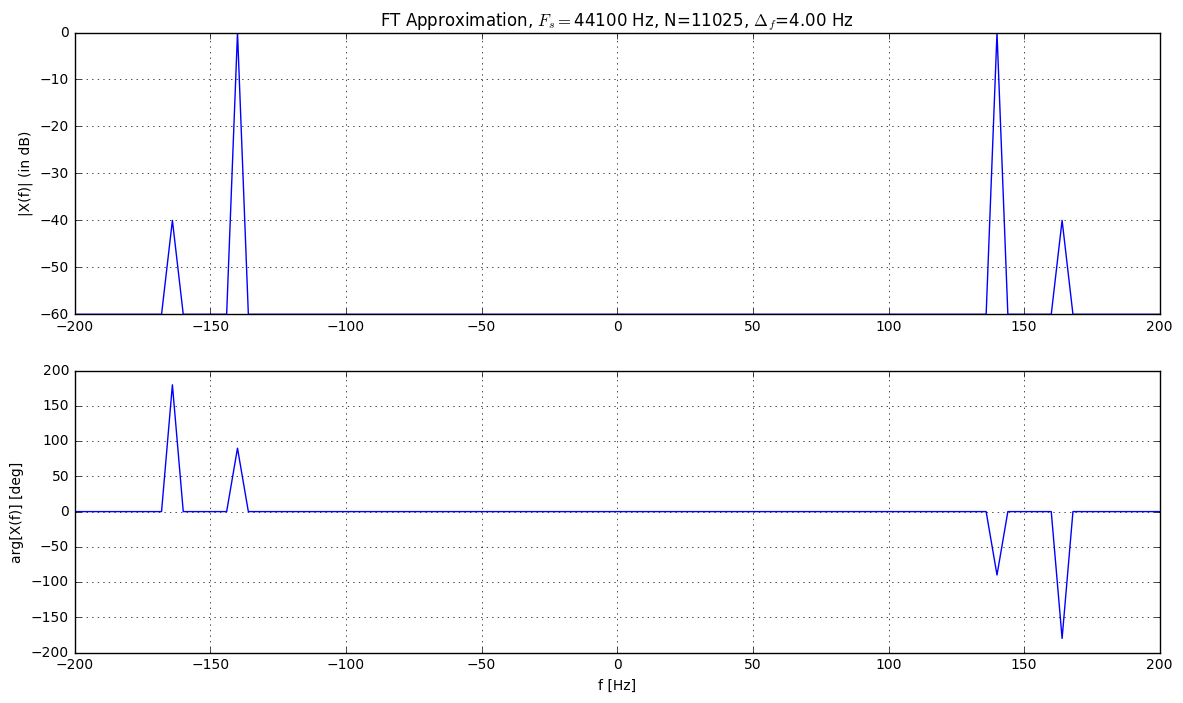

In [4]:
xt = sin(2*pi*fa*tt)-0.01*cos(2*pi*fb*tt)
sig_xt = ecen.sigWave(xt, Fs, 0)
showfun.showft_plusplus(sig_xt,[-200, 200, -60]) # Display X(f) in dB, using ff_lim

-------------------------------------------------------------------------------------------------------------------------

##### Part C.)

/home/mowoodsiii/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab01
/home/mowoodsiii/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab02
"Maurice" = 


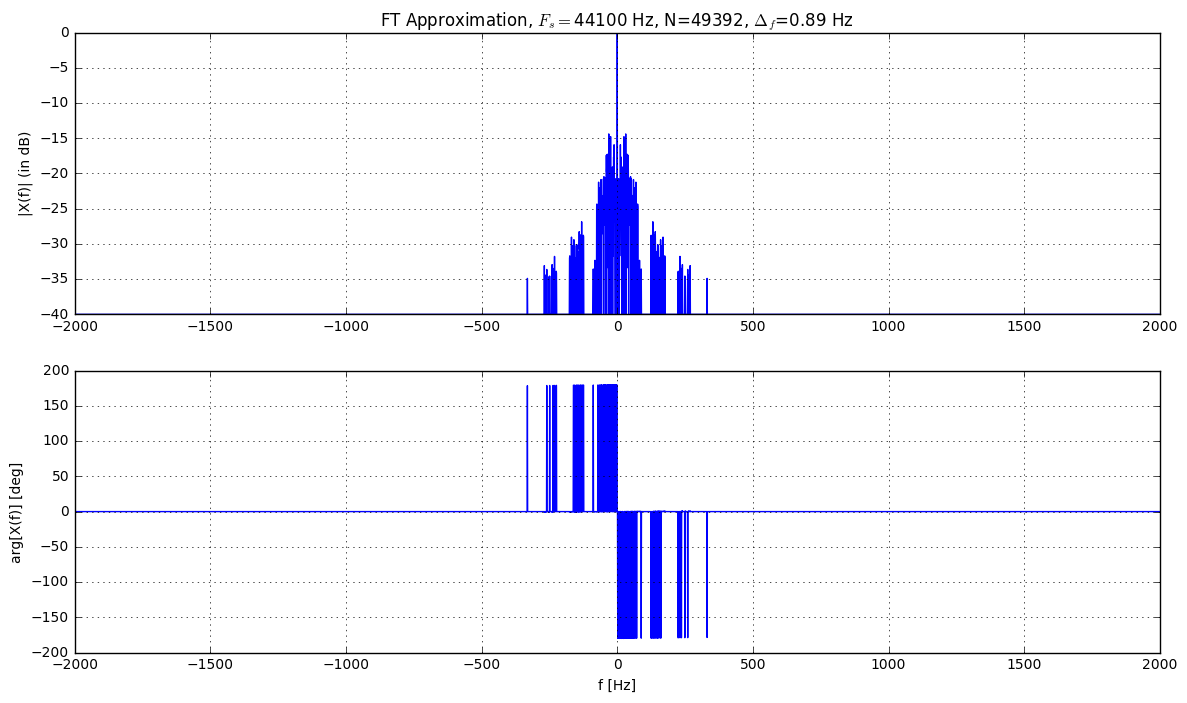

In [5]:
import os
% cd ../Lab01
from ftpam01 import ascii2ftpam
% cd -

Tb=1.0/100.0

[sig_xt,tt,Fs]=ascii2ftpam("Maurice",8,"",44100,1/Tb)
# Mirror the FTPAM string about t=0s
sig_xt = concatenate([sig_xt[::-1],sig_xt])

sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showft_plusplus(sig_xt,[-2000, 2000, -40]) 

-------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------

### E02 -  General PAM Transmitter "pam10"

##### Part A.)

/home/mowoodsiii/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab01
/home/mowoodsiii/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab02


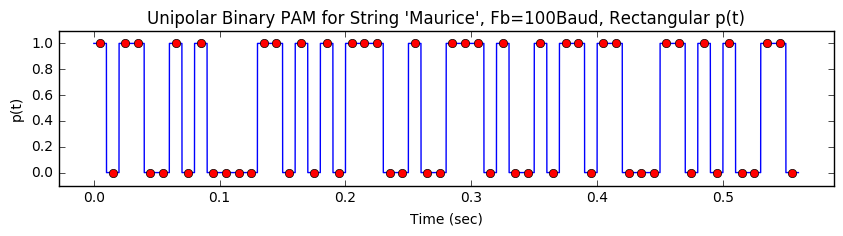

In [6]:
from pamfun import *
from pylab import *

import os
% cd ../Lab01
from ascfun import asc2bin
from quickplot import *
% cd - 

# Rectangle -----------------------------------------------------------------------------------
Fb = 100 # Baud rate (bits/sec)
Fs = 44100 # Sampling frequency (samples/sec)
Sb = int(Fs/float(Fb)) # Samples per bit

string = "Maurice"
dn = asc2bin(string,8)
sig_pt = ecen.sigSequ(dn,Fb)
pam_pt = pam10(sig_pt,Fs,'rect')
tt=arange(len(pam_pt))/float(pam_pt.Fs)

dtt = tt[int(Sb/2)::Sb]
dpam_pt = pam_pt.sig[int(Sb/2.0)::Sb]

title_str = "Unipolar Binary PAM for String '" + str(string) + "', Fb=" + str(Fb) + "Baud, Rectangular p(t)"
quickplot(tt,pam_pt.sig,"-b",dtt,dpam_pt,"or","Time (sec)","p(t)",title_str,10,3)

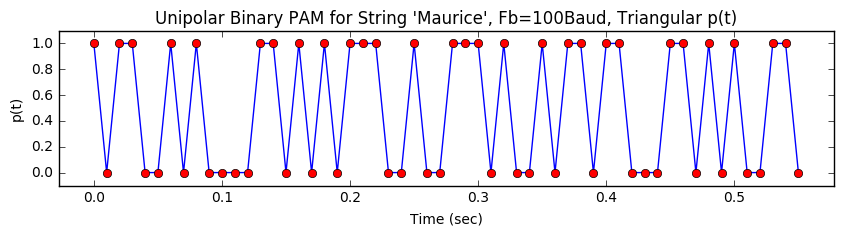

In [7]:
# Triangle -----------------------------------------------------------------------------------
Fb = 100 # Baud rate (bits/sec)
Fs = Fb
Sb = int(Fs/float(Fb)) # Samples per bit

string="Maurice"
dn = asc2bin(string,8)
sig_pt = ecen.sigSequ(dn,Fb)
pam_pt = pam10(sig_pt,Fs,'tri')
tt=arange(len(pam_pt))/float(pam_pt.Fs)

dtt = tt[int(Sb/2)::Sb]
dpam_pt = pam_pt.sig[int(Sb/2.0)::Sb]

title_str="Unipolar Binary PAM for String '" + str(string) + "', Fb=" + str(Fb) + "Baud, Triangular p(t)"
quickplot(tt,pam_pt.sig,"-b",dtt,dpam_pt,"or","Time (sec)","p(t)",title_str,10,3)

/home/mowoodsiii/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab01
/home/mowoodsiii/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab02


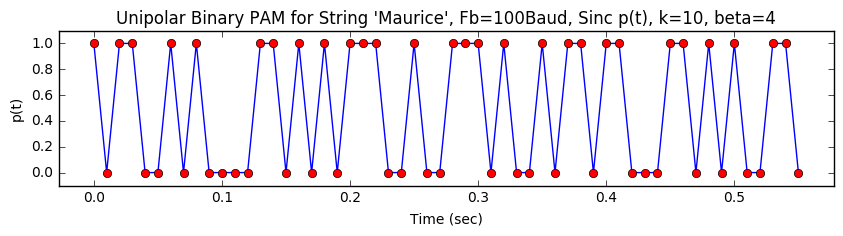

In [8]:
# Sinc -----------------------------------------------------------------------------------
% cd ../Lab01
from sinc_ipol import *
% cd -

Fb = 100 # Baud rate (bits/sec)
Fs = Fb
Sb = int(Fs/float(Fb)) # Samples per bit
beta=4
k=10
fL=3000

ttsinc,sinct = sinc(Fs, fL, k)

string="Maurice"
dn = asc2bin(string,8)
sig_pt = ecen.sigSequ(dn,Fb)
pam_pt = pam10(sig_pt,Fs,'tri',[k,beta]) # TODO
tt=arange(len(pam_pt))/float(pam_pt.Fs)

dtt = tt[int(Sb/2)::Sb]
dpam_pt = pam_pt.sig[int(Sb/2.0)::Sb]

title_str="Unipolar Binary PAM for String '" + str(string) + "', Fb=" + str(Fb) + "Baud, Sinc p(t), k=" + str(k) + ", beta=" + str(beta)
quickplot(tt,pam_pt.sig,"-b",dtt,dpam_pt,"or","Time (sec)","p(t)",title_str,10,3)

-------------------------------------------------------------------------------------------------------------------------

##### Part B.)

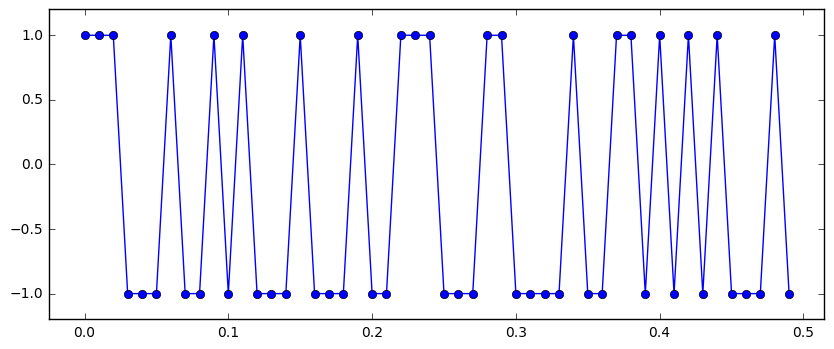

In [10]:
Fb=100
dn = random(int(Fb/2))          # Random sequence, uniform in [0...1]
dn = array(floor(2*dn),int)     # Random unipolar binary sequence in {0,1}
an = 2*dn-1                     # Random polar binary sequence in {-1,+1}
tt=arange(len(an))/float(Fb)
quickplot(tt,an,"o-")

-------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------
### References
- Youtube: Interpolation - https://www.youtube.com/watch?v=vp4nKygufEc
- Youtube: Sampleing Theorem - https://www.youtube.com/watch?v=_Z7ErH7UTMs